<a href="https://colab.research.google.com/github/Jin0704/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# 1. 在你的 Colab 程式碼中載入 Titanic 資料集的 `train.csv` 資料集，可以參考這一篇 教學 中的網址或上傳方法。

# （資料網址：https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv）

# 2. 請根據 Kaggle 文件瞭解 Titanic 資料中所有欄位的定義為何？

# 3. 進一步觀察每一個欄位「數值欄位/類別欄位」與「是否生存欄位」之關係程度，找出關係大的欄位。

# （Hint: 可以利用視覺化圖表、 correlation、feature importance 等方法）

# 4. 承上題，請問你是如何定義與解讀什麼稱為「關係大」呢？

In [3]:
# 1. 在你的 Colab 程式碼中載入 Titanic 資料集的 `train.csv` 資料集，可以參考這一篇 教學 中的網址或上傳方法。

# （資料網址：https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv）

url = 'https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv'
df = pd.read_csv(url)
target = df['Survived']

print(df.head())
print(target.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
0 

In [4]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
#判斷是否有空值以及是否要欄位轉型
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<ipython-input-6-8a00a6a4e961>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

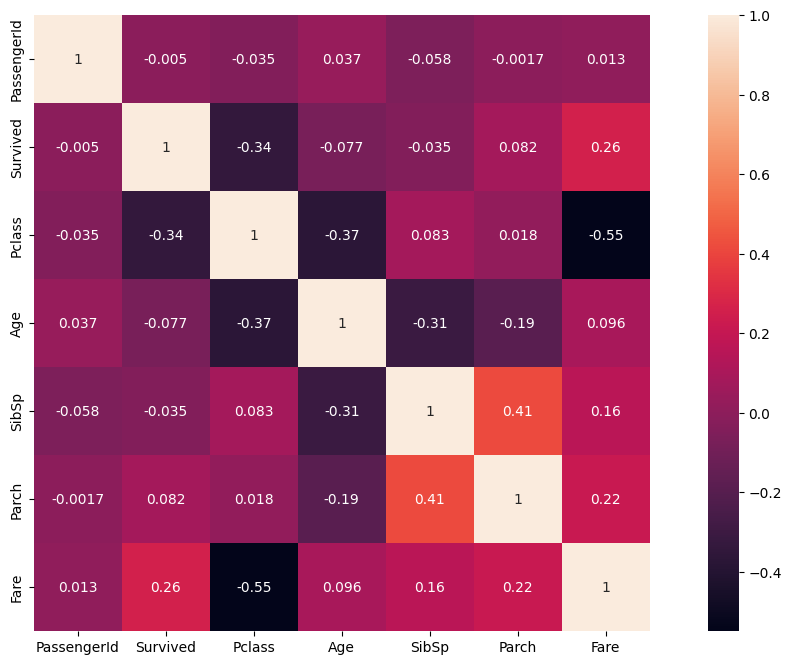

In [6]:
#進一步觀察每一個欄位「數值欄位/類別欄位」與「是否生存欄位」之關係程度，找出關係大的欄位。
import matplotlib.pyplot as plt
import seaborn as sns

df.drop(columns='Name')
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,square=True,annot=True)

In [14]:
corr = df.corr()['Survived']
print(corr.apply(lambda x:x>0))

PassengerId    False
Survived        True
Pclass         False
Age            False
SibSp          False
Parch           True
Fare            True
Name: Survived, dtype: bool


<ipython-input-14-0bca52c87916>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()['Survived']
